# PREDICTION OF THE VACCINATION RATES AMONGST PEOPLE



DrivenData Challenge:
https://www.drivendata.org/competitions/66/flu-shot-learning/

Author: Tomasz Stankowski, August 2021, Birmingham.

## General imports

In [13]:
import scipy as sc
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import keras 
import tensorflow

## Data imports

In [61]:
X_train = pd.read_csv('training_set_features.csv')
y_train = pd.read_csv('training_set_labels.csv')

X_test = pd.read_csv('test_set_features.csv')


# merge train data for plotting
tot_train = pd.merge(left=X_train, right=y_train, how='outer', on='respondent_id')

In [11]:
print (X_train.columns)
print (y_train.columns)
# print (X_test.columns)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [17]:
print(X_train.head(5))

   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

## Visualise the incomming data

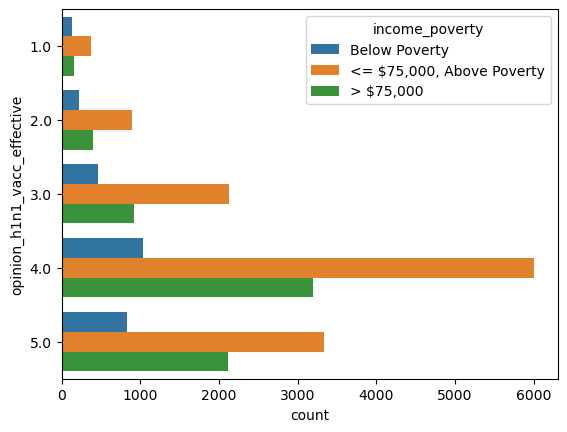

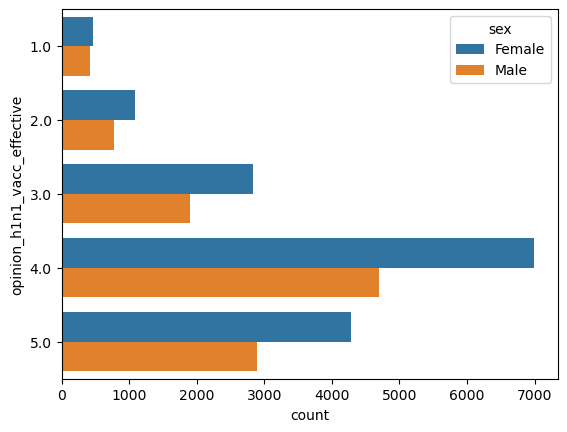

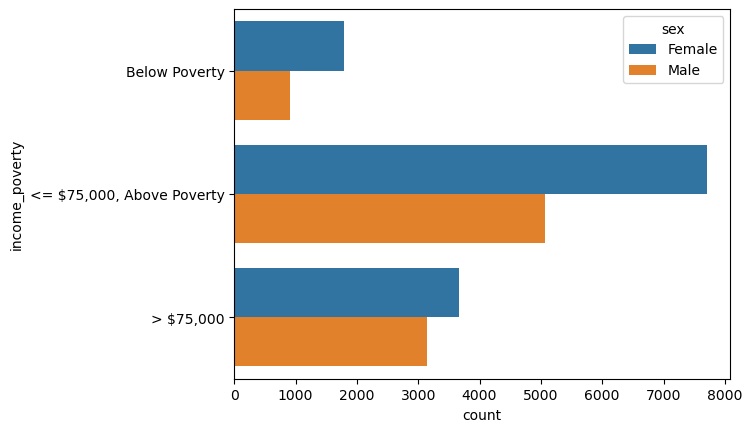

In [48]:
# bplot = sns.boxplot(y=X_train['opinion_h1n1_vacc_effective'], x=X_train['employment_industry'],
#                  width=0.5,
#                  palette="colorblind")

# bplot = sns.violinplot(x='income_poverty', y=y_train['h1n1_vaccine'], hue='sex', groupby='opinion_h1n1_vacc_effective', data = X_train)
bplot = sns.countplot(y=X_train['opinion_h1n1_vacc_effective'], hue=X_train['income_poverty'])
plt.show()

bplot2 = sns.countplot(y=X_train['opinion_h1n1_vacc_effective'], hue=X_train['sex'])
plt.show()

bplot3 = sns.countplot(y=X_train['income_poverty'], hue=X_train['sex'])
plt.show()

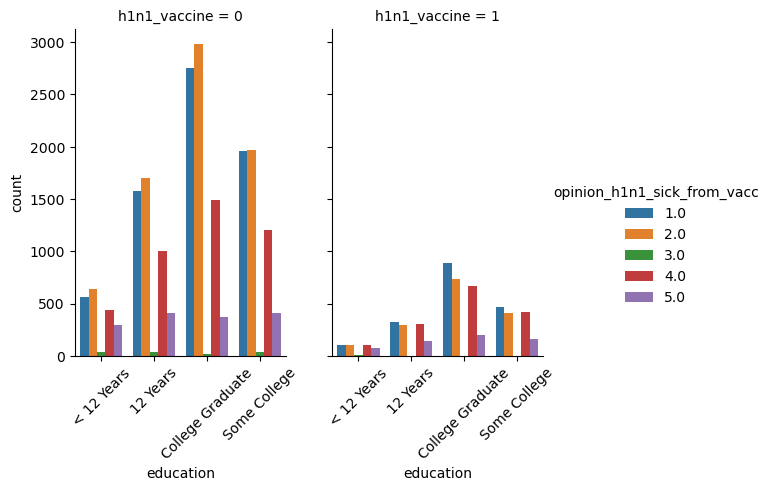

In [92]:
g = sns.catplot(x="education", hue="opinion_h1n1_sick_from_vacc", col="h1n1_vaccine",
                data=tot_train, kind="count",
                height=4, aspect=.7);
rotation = 45 
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)

plt.show()

## Simple SKLEARN model

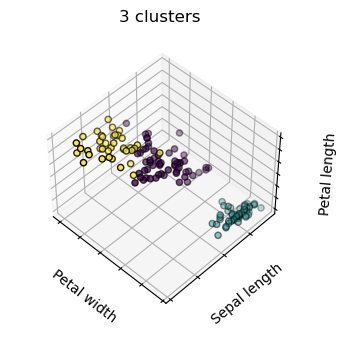

In [103]:
import numpy as np
import matplotlib.pyplot as plt
# not used directly, but needed:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

est = KMeans(n_clusters=3)
est.fit(X)


fignum = 1
titles = [ '3 clusters']

fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)
labels = est.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
            c=labels.astype(float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title(titles[fignum - 1])
ax.dist = 12


# Plot the ground truth
# fig = plt.figure(fignum, figsize=(4, 3))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134,)
# for name, label in [('Setosa', 0),
#                     ('Versicolour', 1),
#                     ('Virginica', 2)]:
#     ax.text3D(X[y == label, 3].mean(),
#               X[y == label, 0].mean(),
#               X[y == label, 2].mean() + 2, name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('Petal width')
# ax.set_ylabel('Sepal length')
# ax.set_zlabel('Petal length')
# ax.set_title('Ground Truth')
# ax.dist = 12

plt.show()